<a href="https://colab.research.google.com/github/maxmonteiro2008/Academic/blob/main/Dasa_Prestadores_Novo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teste do Radom Forest Prestadores

In [75]:
!pip install pyjarowinkler

In [76]:
!pip install thefuzz

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydot
from pyjarowinkler import distance
from thefuzz import fuzz
import difflib
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
import joblib
#from sklearn.semi_supervised import LabelSpreading


In [132]:
pip freeze > mx_requirements.txt

Open the file and cleanning it

In [129]:
data = pd.read_excel("max_dados_3.xlsx", header=0)

origi=data


# limpando duplicados
data.drop_duplicates(inplace = True)

print (data.columns)
# calculando  Similaridades
for x in data.index:
   # pyjarowinkler similarities

   if (type(data.loc[x,"nmPrestador"])==str) and (type(data.loc[x,"nmPrestador_clean"])==str):
       data.loc[x,["sim_nmPrestadorJaro"]]=distance.get_jaro_distance(data.loc[x,"nmPrestador"].strip().lower(), data.loc[x,"nmPrestador_clean"].strip().lower(), winkler=True, scaling=0.1)
   else:
       data.loc[x,["sim_nmPrestadorJaro"]]=distance.get_jaro_distance(data.loc[x,"nmPrestador"], data.loc[x,"nmPrestador_clean"], winkler=True, scaling=0.1)


   if (type(data.loc[x,["nmFantasia"]])==str)and (type(data.loc[x,["nmFantasia_clean"]])==str):
       data.loc[x,["sim_nmFantasiaJaro"]]=distance.get_jaro_distance(data.loc[x,"nmFantasia"].strip().lower(), data.loc[x,"nmFantasia_clean"].strip().lower(), winkler=True, scaling=0.1)
   else:
       data.loc[x,['nmFantasia_clean']]="______ "
       data.loc[x,["sim_nmFantasiaJaro"]]=distance.get_jaro_distance(data.loc[x,"nmFantasia"].strip().lower(), data.loc[x,"nmFantasia_clean"].strip().lower(), winkler=True, scaling=0.1)
       #data.loc[x,["sim_nmFantasiaJaro"]]=0.0

   #
   # fuzz similarities
   if (type(data.loc[x,["nmPrestador_clean"]])==str)and (type(data.loc[x,["nmFantasia"]])==str)and (type(data.loc[x,["nmFantasia_clean"]])==str)and (type (data.loc[x,["zaosocial"]])==str):
      data.loc[x,["sim_nmPrestadorClean_razaosocialFuzz"]]=fuzz.ratio(data.loc[x,"nmPrestador_clean"].strip().lower(), data.loc[x,"razaosocial"].strip().lower())
      data.loc[x,["sim_nmPrestadornmFantasiaFuzz"]]=fuzz.ratio(data.loc[x,"nmPrestador"].strip().lower(), data.loc[x,"nmFantasia"].strip().lower())
      data.loc[x,["sim_nmFantasiaClean_razaosocialFuzz"]]=fuzz.ratio(data.loc[x,"nmFantasia_clean"].strip().lower(), data.loc[x,"razaosocial"].strip().lower())
      data.loc[x,["sim_nmPrestadornmFantasiaFuzz"]]=fuzz.ratio(data.loc[x,"nmFantasia"].strip().lower(), data.loc[x,"nmFantasial_clean"].strip().lower())
   else:

      data.loc[x,["sim_nmPrestadorClean_razaosocialFuzz"]]=fuzz.ratio(data.loc[x,"nmPrestador_clean"].strip().lower(), data.loc[x,"razaosocial"].strip().lower())
      data.loc[x,["sim_nmPrestadornmFantasiaFuzz"]]=fuzz.ratio(data.loc[x,"nmPrestador"].strip().lower(), data.loc[x,"nmFantasia"].strip().lower())
      data.loc[x,["sim_nmFantasiaClean_razaosocialFuzz"]]=fuzz.ratio(data.loc[x,"nmFantasia_clean"].strip().lower(), data.loc[x,"razaosocial"].strip().lower())
      data.loc[x,["sim_nmFantasiaClean_razaosocialFuzz"]]=fuzz.token_sort_ratio(data.loc[x,"nmFantasia_clean"], data.loc[x,"razaosocial"].strip().lower())
      data.loc[x,["sim_nmFantasiaFuzz"]]=fuzz.ratio(data.loc[x,"nmFantasia"], data.loc[x,"nmFantasia_clean"])





# drop string variables



data.drop(
[
"Prestador_cdPrestadorGUID",
"nmPrestador",
"nmFantasia",
"dsEmail",
"dsTipoPrestador",
"nuCNPJ",
"nuCNES",
"nuCRM",
"nuInscricaoMunicipal",
"nuInscricaoEstadual",
"dsPrestadorUnidade",
"cdPrestadorNaOperadora",
"dsEspecialidade",
"longitude",
"latitude",
"nuTelefone",
"nuCEP",
"dsLogradouro",
"dsNumero",
"dsBairro",
"dsMunicipio",
"dsUf",
"dsComplemento",
"nmPrestador_clean",
"nmPrestador_levenstein",
"nmFantasia_clean",
"nuCNPJ_clean",
"nuCNES_clean",
"nuCRM_clean",
"nuInscricaoMunicipal_clean",
"nuInscricaoEstadual_clean",
"nuTelefone_clean",
"nuCEP_clean",
"dsLogradouro_clean",
"dsNumero_clean",
"dsBairro_clean",
"dsMunicipio_clean",
"dsUf_clean",
"dsComplemento_clean",
"dsEndereco",
"flagOrigem",
"cdTipoPrestador",
"key",
"idOperadora",
"idEmpresa",
"key_match",
"flagOrigem_match",
"idEmpresaOrigem_match",
"idOperadoraOrigem_match",
"nuCNPJ_baseouro",
"razaosocial",
"Unnamed: 0",
"Unnamed: 61",
'Unnamed: 62',
'Unnamed: 63',
'Unnamed: 64',
'Unnamed: 65',
'Unnamed: 67'
], axis=1, inplace=True)

data.head(20)
#print(data.columns)

#data["flagHospital"]=data["flagHospital"].replace(np.nan, 0)
#data["flagClinica"]=data["flagClinica"].replace(np.nan, 0)
#data["flagHomeCare"]=data["flagHomeCare"].replace(np.nan, 0)
#data["flagLaboratorio"]=data["flagLaboratorio"].replace(np.nan, 0)
#data["flagCardiologia"]=data["flagCardiologia"].replace(np.nan, 0)
#data["flagGinecologia"]=data["flagGinecologia"].replace(np.nan, 0)
#data["flagPediatrico"]=data["flagPediatrico"].replace(np.nan, 0)
#data["flagOrtopedia"]=data["flagOrtopedia"].replace(np.nan, 0)
#data["flagOutros"]=data["flagOutros"].replace(np.nan, 0)
#data["flagOrigem"]=data["flagOrigem"].replace(np.nan, 0)
#for nm in data.columns:
#  print(nm,":",data[nm].isnull().values.any())



Index(['Unnamed: 0', 'Prestador_cdPrestadorGUID', 'nmPrestador', 'nmFantasia',
       'dsEmail', 'dsTipoPrestador', 'nuCNPJ', 'nuCNES', 'nuCRM',
       'nuInscricaoMunicipal', 'nuInscricaoEstadual', 'dsPrestadorUnidade',
       'cdPrestadorNaOperadora', 'dsEspecialidade', 'longitude', 'latitude',
       'nuTelefone', 'nuCEP', 'dsLogradouro', 'dsNumero', 'dsBairro',
       'dsMunicipio', 'dsUf', 'dsComplemento', 'flagHospital', 'flagClinica',
       'flagHomeCare', 'flagLaboratorio', 'flagCardiologia', 'flagGinecologia',
       'flagPediatrico', 'flagOrtopedia', 'flagOutros', 'nmPrestador_clean',
       'nmPrestador_levenstein', 'nmFantasia_clean', 'nuCNPJ_clean',
       'nuCNES_clean', 'nuCRM_clean', 'nuInscricaoMunicipal_clean',
       'nuInscricaoEstadual_clean', 'nuTelefone_clean', 'nuCEP_clean',
       'dsLogradouro_clean', 'dsNumero_clean', 'dsBairro_clean',
       'dsMunicipio_clean', 'dsUf_clean', 'dsComplemento_clean', 'dsEndereco',
       'flagOrigem', 'cdTipoPrestador', 'key'

,flagHospital,flagClinica,flagHomeCare,flagLaboratorio,flagCardiologia,flagGinecologia,flagPediatrico,flagOrtopedia,flagOutros,Y,sim_nmPrestadorJaro,sim_nmFantasiaJaro,sim_nmPrestadorClean_razaosocialFuzz,sim_nmPrestadornmFantasiaFuzz,sim_nmFantasiaClean_razaosocialFuzz,sim_nmFantasiaFuzz
0,0,1,0,0,0,0,0,0,0,0,0.80,0.0,100.0,100.0,0.0,6.0
1,0,1,0,0,0,0,0,0,0,0,0.81,0.0,100.0,100.0,0.0,5.0
2,0,1,0,0,0,0,0,0,0,0,0.36,0.0,100.0,100.0,0.0,9.0
3,0,1,0,0,0,0,0,0,0,1,0.98,0.0,100.0,100.0,0.0,6.0
4,0,1,0,0,0,0,0,0,0,0,0.96,0.0,100.0,100.0,0.0,7.0
5,0,1,0,0,0,0,0,0,0,0,0.96,0.0,100.0,100.0,0.0,7.0
6,0,1,0,0,0,0,0,0,0,0,0.62,0.0,100.0,100.0,0.0,6.0
7,0,1,0,0,0,0,0,0,0,0,0.97,0.0,100.0,100.0,0.0,5.0
8,0,1,0,0,0,0,0,0,0,0,0.97,0.0,100.0,100.0,0.0,5.0
9,0,0,1,0,0,0,0,0,0,0,0.98,0.0,100.0,100.0,0.0,5.0


Preparando os dados e treinando o modelo

In [130]:
Y= data["Y"]
X= data.drop(["Y"], axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)
#RF
rf_model = RandomForestClassifier(n_estimators=300, max_features="auto", random_state=0)
rf_model.fit(X_train, Y_train)
#SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


SVC(kernel='linear')

Testando o modelo:


 Accuracy: -inf %.


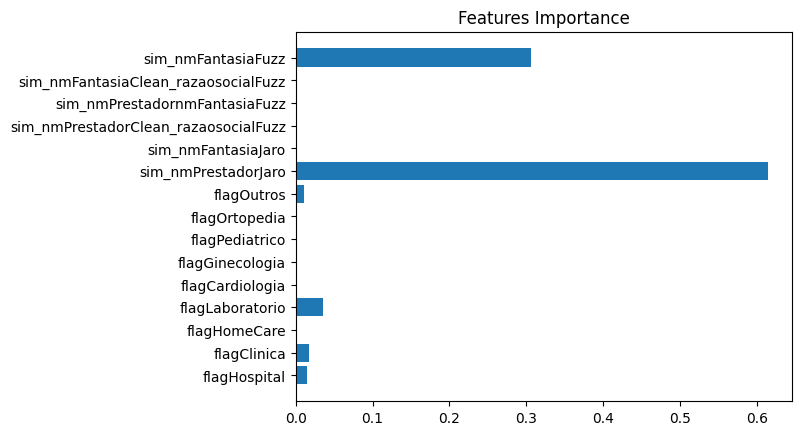

Classification report for classifier RandomForestClassifier(max_features='auto', n_estimators=300, random_state=0):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1175
           1       0.00      0.00      0.00        12

    accuracy                           0.99      1187
   macro avg       0.49      0.50      0.50      1187
weighted avg       0.98      0.99      0.98      1187


Confusion matrix:
[[1172    3]
 [  12    0]]


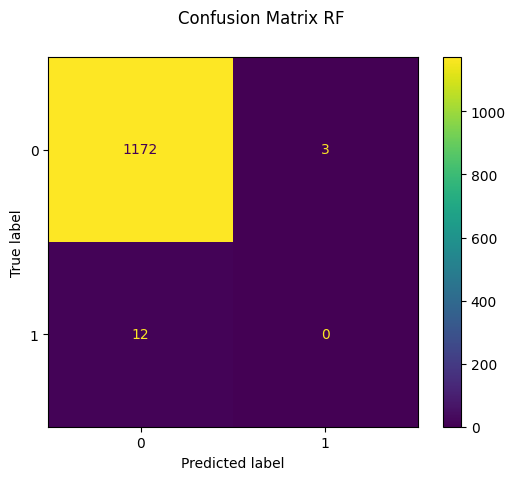



[0 0 0 ... 0 0 0]
SVM-Accuracy: 0.9898904802021904
Classification report for classifier SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1175
           1       0.00      0.00      0.00        12

    accuracy                           0.99      1187
   macro avg       0.49      0.50      0.50      1187
weighted avg       0.98      0.99      0.98      1187


Confusion matrix:
[[1175    0]
 [  12    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


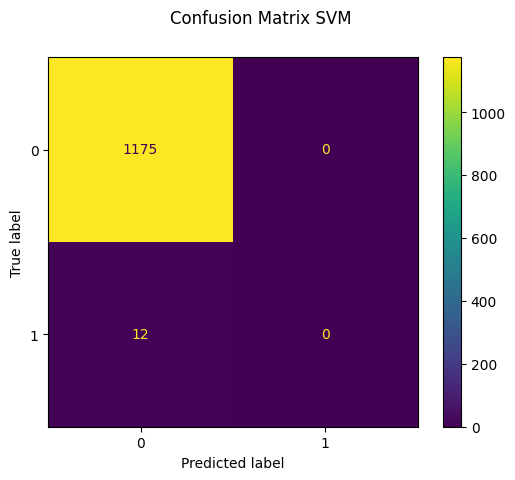

In [131]:
predictions = rf_model.predict(X_test)
#predprob=rf_model.predict_proba(X_test)
predsvm=clf.predict(X_test)
importances=rf_model.feature_importances_
columns=X.columns
errors = np.abs(predictions - Y_test)
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('\n Accuracy:', round(accuracy, 2), '%.')
#rf_model.predict_proba(X_test)
y_axis = np.arange(1, 5, 1)
y_values=np.arange(1,100, 1)
fig, ax = plt.subplots()
plt.barh(columns, importances, align='center')
#plt.yticks(y_axis, y_values)
ax.set_title('Features Importance')
plt.show()

print(
    f"Classification report for classifier {rf_model}:\n"
    f"{metrics.classification_report(Y_test, predictions)}\n"
)
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, predictions)
disp.figure_.suptitle("Confusion Matrix RF")

print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()
print("\n")
print(predictions)
print("SVM-Accuracy:",metrics.accuracy_score(Y_test, predsvm))
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, predsvm)
disp.figure_.suptitle("Confusion Matrix SVM")
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(Y_test, predsvm)}\n"
)

print(f"Confusion matrix:\n{disp.confusion_matrix}")

In [ ]:
predictions = rf_model.predict(X_test)
origi['match']=predictions
origi.head(50)

Interpretando o Modelo

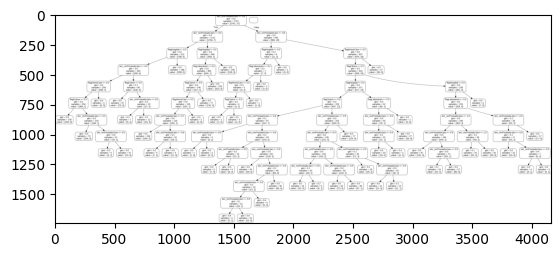

['./random_forest_m1.joblib']

In [114]:
# Extract the small tree
tree= rf_model.estimators_[5]
# Save the tree as a png image
export_graphviz(tree, out_file = 'tree.dot', feature_names = columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png');
img = plt.imread('tree.png')
plt.imshow(img)
plt.show()
joblib.dump(rf_model, "./random_forest_m1.joblib")

#ax = plt.gca()
#rfc_disp = RocCurveDisplay.from_estimator(rf_model, X_test, Y_test, ax=ax, alpha=0.8)
#rfc_disp.plot(ax=ax, alpha=0.8)
#plt.show()